## Exploratory data Analysis on all batches of FMECA
#### Identifying patterns and trends

In [21]:

import xlwings as xw
import os
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import seaborn as sns

In [22]:
path = 'C:/Users/nisha/OneDrive - Floating Solutions Consulting/Documents/04. Projects/JAD-01 MV Main Deck/03. Working/FMECA/Batch 5 FMECA 2022/FMECA spreadsheets/AN_working'
nameFile = 'Allbatches1.xlsx'
file_path = os.path.join(path,nameFile)
book = xw.Book(file_path)


In [23]:
sht = book.sheets['Sheet1']
rng = sht.range('A1:BP1124')
df = rng.options(pd.DataFrame, omdex=False, header=True).value

In [24]:
df.tail(1)

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action,batch
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1123.0,VER-52531-4SWBT-BHD46-CR-001-066,4SWBT-BHD46-CR-066,AC,FR.46,VS22,THBHD46,300.0,200.0,VS22,195.0,HG3,265.0,AH,7.3,15.5,25.0,11.6,12.6,10.7,9.8,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,9.9,9.3,5.6,0.359,R,Trans bhd,Panel,Plate,None,Pitting,Trans bhdPanelPlatePitting,8.0,7.0,8.0,448.0,None,NaN,Investigate further and perform calculation if...,No,Arrest & monitor CVI,8.0,3.0,4.0,96.0,NaN,NaN,0.359,Local,Med,High,N,Pit,Tank boundary plating,Between 6 - 10mm remaining,Arrest and monitor CVI,Scheduled tank inspection,Local pitting on transverse bulkhead plating f...,Arrest & monitor CVI,4.0


In [25]:
df['Location'].unique()

array(['Tank boundary plating', 'Stiffener web',
       'Stiffener flange middle 1/3', None], dtype=object)

Text(0.5, 1.0, 'Repair method')

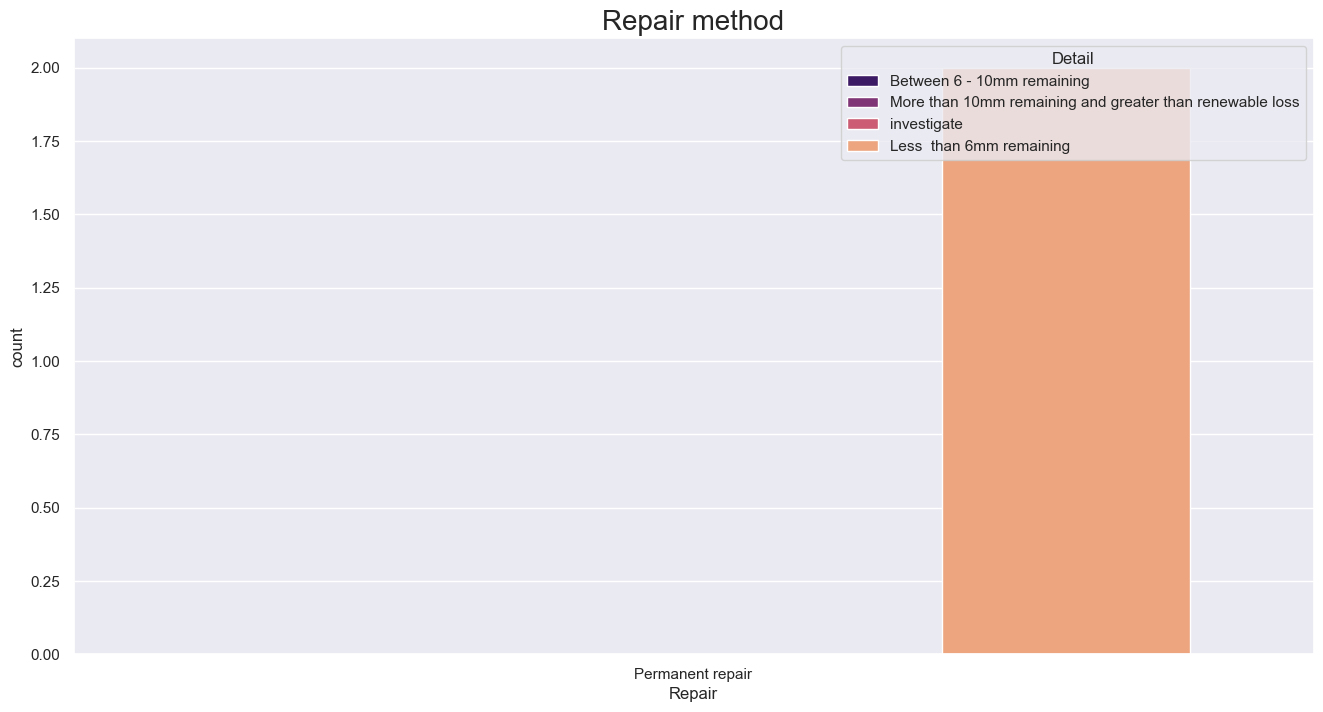

In [26]:
sns.set(rc={'figure.figsize':(16,8)})
a = sns.countplot(x= 'Repair',
hue = 'Detail',
data = df[(df['Final Anomaly description'] == 'Pit within generalised corrosion')],
palette='magma')

a.axes.set_title('Repair method',fontsize=20)


Text(0.5, 1.0, 'Repair vs ')

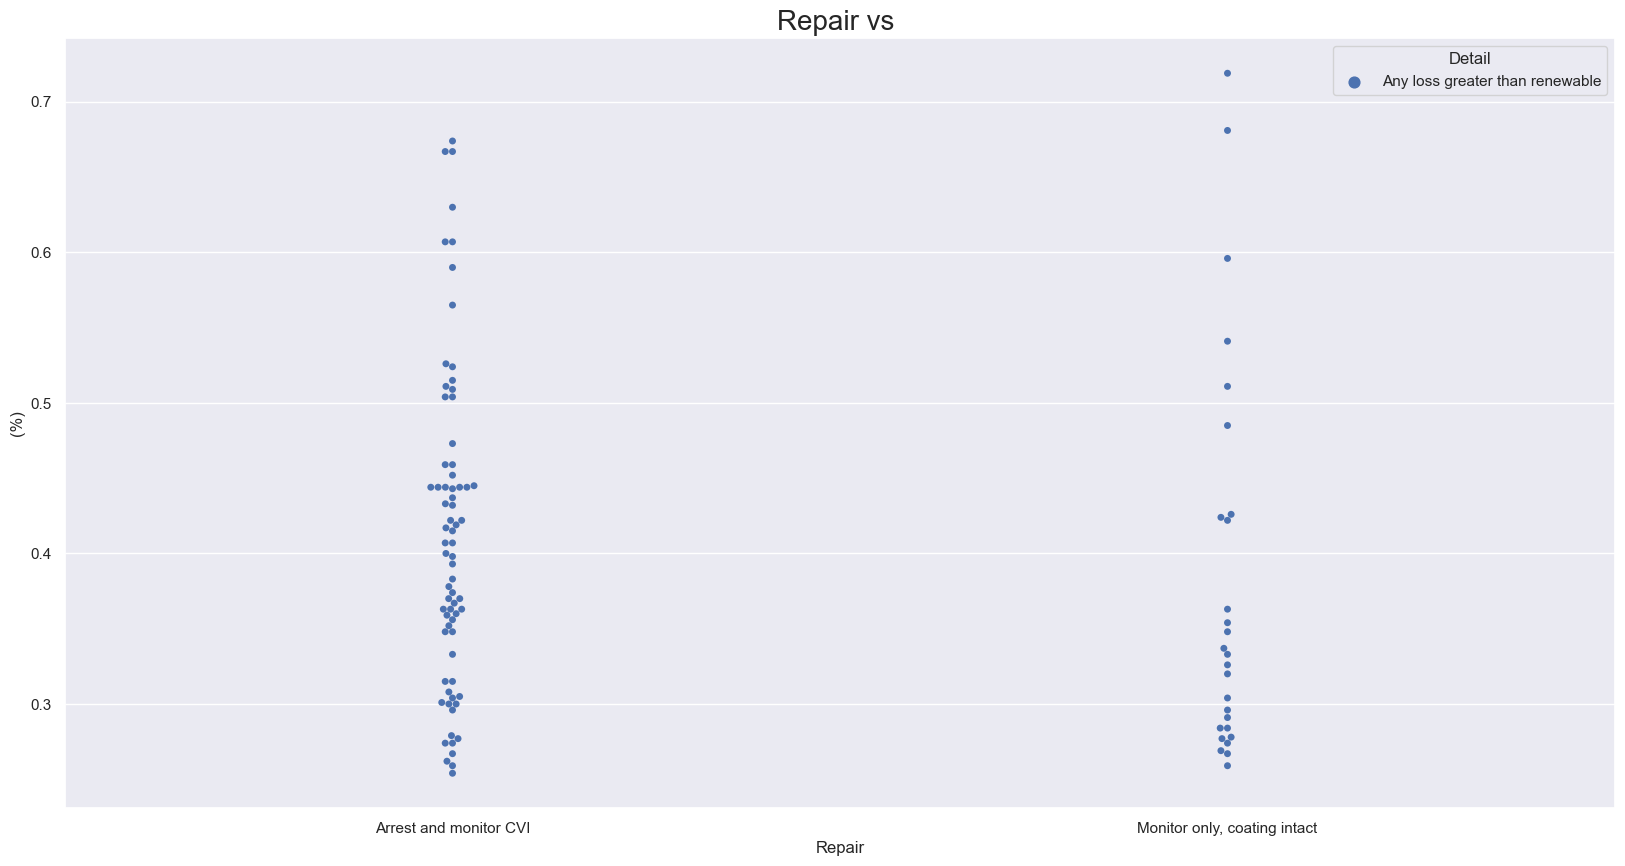

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
a = sns.swarmplot(x= 'Repair',
y = '(%)',
data = df[(df['Location'] == 'Stiffener web') & (df['Detail'] == 'Any loss greater than renewable')],
hue = 'Detail')

a.axes.set_title('Repair vs ',fontsize=20)

In [28]:
df.head(1)

,Report reference,Anomaly ID,Anomaly Type,Frame(s),Stiffener(s),Structural Component,Length (X),Width/Height\n(Y),"Nearest transverse member (Fr., TWF,TBHD)",Longitudinal\n(l) (distance\nfrom in mm),"Nearest longitudinal member (SS,ObLBHD)",Transverse (t) (distance from in mm),Grade,Weight\n(kgs),As Built Thickness\n(mm),Max Allowable Diminution (%),Renewal Thickness (mm),Substantial Corer Thickness (mm),EN01,EN02,EN03,EN04,EN05,EN06,EN07,EN08,EN09,EN10,Average UTM Reading (mm),Minimum \nUTT \nReading,(mm),(%),FLAG,Primary Structure,Secondary Structure,Local Structure,Detail Structure,Anomaly Nature,Concatenate,Sev,Occ,Det,RPN\npre-action,Adj Occ pre,Adj\nRPN \npre-action,Required Engineering Action,Has engineering action been completed ?,Generic action (following engineering action),Sev2,Occ2,Det2,RPN\npost-action,Adj Occ post,Adj\nRPN \npost-action,Avg % diminution,Anom extents,Stress level (location on span),Proximity / density of anom.,Stress / buckling calc?,Final Anomaly description,Location,Detail,Repair,Inspection interval,Assessment notes,Adj Final action,batch
Item No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,VER-52531-4SWBT-LBHD-CR-0001-1379,4SWBT-LBHD- CR-192,AW,49-50,LL15,LBHD,4200.0,100.0,FR.49,500.0,LL15,0.0,AH,44.5,13.5,0.2,10.8,11.5,8.0,6.9,8.7,3.7,4.1,7.5,7.9,7.4,7.5,6.2,6.8,3.7,6.7,0.497,R,Long'l bhd,Panel,Plate,None,Corrosion,Long'l bhdPanelPlateCorrosion,5.0,7.0,8.0,280.0,None,0.0,Investigate further and perform calculation if...,No,Arrest & monitor CVI,5.0,3.0,4.0,60.0,NaN,0.0,0.497,Local,Med,Med,Y,Generalised corrosion,Tank boundary plating,Between 6 - 10mm remaining,Permanent repair,Scheduled tank inspection,Local pitting on longitudinal bulkhead plating...,Permanent repair,5.0


In [29]:
df_rest = df[df['batch'] != 5]

In [30]:
df_5a = df[df['batch'] == 5]

In [31]:
#xw.view(df_rest.groupby(['Repair']).count())

In [32]:
xw.view(df_5a.groupby(['Repair']).count())

In [33]:
df['Repair'].unique()

array(['Permanent repair', None, 'Arrest and monitor CVI',
       'Monitor only, coating intact'], dtype=object)